In [2]:
#文本读取
file  = open('c.txt')
txt = file.read()

In [3]:
#文本长度、段落数
len(txt)#文本长度

1687

In [4]:
txt_lines = file.readlines()

In [5]:
len(txt_lines)#段落数

0

In [6]:
#分词、去除停用词
import jieba
txt_seg = jieba.lcut(txt)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/6v/hcjl1t0d7yz3vwhw_xjx8jjm0000gn/T/jieba.cache
Loading model cost 0.632 seconds.
Prefix dict has been built successfully.


In [7]:
txt_seg[:10]#查看

['我国', '信息', '分析', '的', '现状', '与', '发展趋势', '\n', '18', '秋']

In [8]:
stop_words = open('stopwords.txt').readlines()#读停用词
stop_words[:10]#查看

['!\n', '"\n', '#\n', '$\n', '%\n', '&\n', "'\n", '(\n', ')\n', '*\n']

In [9]:
stop_words =  [w.strip() for w in stop_words]#去除空格换行符
stop_words[:10]#查看

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*']

In [10]:
words_clean = [w for w in txt_seg if w not in stop_words]#去除停用词
words_clean[:10]#查看

['我国', '信息', '分析', '现状', '发展趋势', '\n', '18', '秋', '信息资源管理', '数据分析']

In [11]:
len(words_clean)

537

In [23]:
words_clean = [w for w in words_clean if w not in ['\u3000','\n',' '] ]#进一步去除不想要的词

In [29]:
words_clean = [w for w in words_clean if len(w) > 1 ]#进一步去除不想要长度的词,单字词表义不够明朗

In [30]:
from collections import Counter
word_freq = Counter(words_clean)

In [31]:
word_freq['信息']

37

In [32]:
word_freq['发展']

4

In [33]:
word_freq.most_common(20)

[('分析', 44),
 ('信息', 37),
 ('数据', 26),
 ('用户', 11),
 ('研究', 9),
 ('数据分析', 7),
 ('世纪', 7),
 ('环境', 7),
 ('20', 6),
 ('年代', 6),
 ('国内', 6),
 ('技术', 6),
 ('阶段', 6),
 ('协同', 6),
 ('参与', 6),
 ('过程', 5),
 ('发展趋势', 4),
 ('方向', 4),
 ('发展', 4),
 ('领域', 3)]

# 词云

In [41]:
from os import path#读取路径
from imageio import imread#读取图片
import matplotlib.pyplot as plt#绘图包
# from wordcloud import wordCloud, ImageColorGenerator#专门绘制词云的库，图片背景拾取色彩功能

In [36]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.2/159.2 kB 191.1 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [55]:
import scipy
import wordcloud as wcdd#不改名字和里面的函数wordcloud重复，用不了，一直报错

In [87]:
filepath = '/Users/wangjing/Desktop/学习/19门专业基础/Python/Python编程与新媒体文本挖掘'#设置路径
img = imread(path.join(filepath, "cat.jpg"))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  


In [97]:
#词云函数
#中文词云，不能使用默认分词，因此可以计算好词频后使用generate_from_frequencies函数
wc = wcdd.WordCloud(
    font_path = '/Users/wangjing/Desktop/学习/19门专业基础/Python/Python编程与新媒体文本挖掘/清松手写体3.ttf',#设置中文字体
    background_color = "white", #设置背景颜色，max_words=2000,#词云显示最大数
    mask = img,#设置背景图片
    max_font_size =1000,#字体最大值
    random_state  = 42)#随便设了一个，我也不知道是啥

In [98]:
#导入词频文件,freqdist例子为字典格式；Counter返回的格式就是字典，上文中word_freq
wc.generate_from_frequencies(word_freq)

In [99]:
#从背景图生成颜色值。不设置的话会随机生成颜色
image_colors = wcdd.ImageColorGenerator(img)

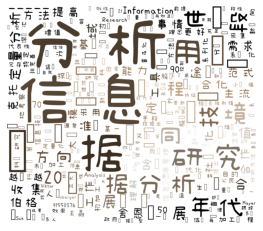

In [100]:
#绘制字体为颜色的图片
plt.imshow(wc.recolor(color_func = image_colors))
plt.axis("off")#一般设置横轴、纵轴，但词云图不要哦
plt.show()

In [101]:
#保存图片
wc.to_file(path.join(filepath,"wordcloud_datacat1.jpg"))